# Algoritmi Avanzati, 07.05.2019
---

### EXERCISE 12

Given a 2-dimensional dataset like data1.csv, data2.csv or data3.csv, implement and apply k-means hard clustering with k = 2 and k = 3. Use the Euclidean distance as dissimilarity metric. At each training iteration of the algorithm, compute the quantization error and plot data points and centroids with a different color for each cluster.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

dataset = pd.read_csv("Datasets/data1.csv")
dataset = np.array(dataset)
dataset[:5,:]

array([[ 8, 49],
       [24, 30],
       [ 3, 48],
       [39, 47],
       [23, 39]])

In [2]:
def dist(a, b):
    tmp = (b[0]-a[0])**2 + (b[1]-a[1])**2
    return np.sqrt(tmp)


def nearest_centroid(point, centroids):
    min_d, min_c = -1, -1
    
    for i, c in enumerate(centroids):
        d = dist(point, c)
        if min_c == -1 or d < min_d:
            min_d, min_c = d, i
    
    return min_c


def k_means(K):
    centroids = dataset[np.random.permutation(len(dataset))[:K], :]
    clusters  = [np.empty(shape=(0,2), dtype=int) for _ in range(K)]
    fig       = plt.figure(figsize=(12, 22))
    converged = False
    iteration = 1
    
    while not converged:
        q_error = [0 for _ in range(K)]
        
        for r in dataset:
            c = nearest_centroid(r, centroids)
            clusters[c] = np.append(clusters[c], [r], axis=0)
            q_error[c] += dist(r, centroids[c])**2

        
        ax = fig.add_subplot(5, 2, iteration)
        ax.set_title("Iteration: {},   Avg Q Error: {}"
                     .format(str(iteration), int(sum(q_error)/K)))
        ax.set_xticks([])
        ax.set_yticks([])
        
        for c in clusters:  ax.scatter(c[:, 0], c[:, 1])
        for c in centroids: ax.scatter([c[0]], [c[1]], marker='+', color='black', s=200)
        
        new_centroids = [np.mean(c, axis=0) for c in clusters]
        
        if np.array_equal(new_centroids, centroids):
            converged = True
        else:
            centroids = new_centroids
            clusters = [np.empty(shape=(0,2), dtype=int) for _ in range(K)]
            iteration += 1
    
    fig.suptitle("K-Means convergence with K = " + str(K), fontsize=18, y=0.91)
    plt.show()

**K-Means with ${k \in \{2, 3\}}$**

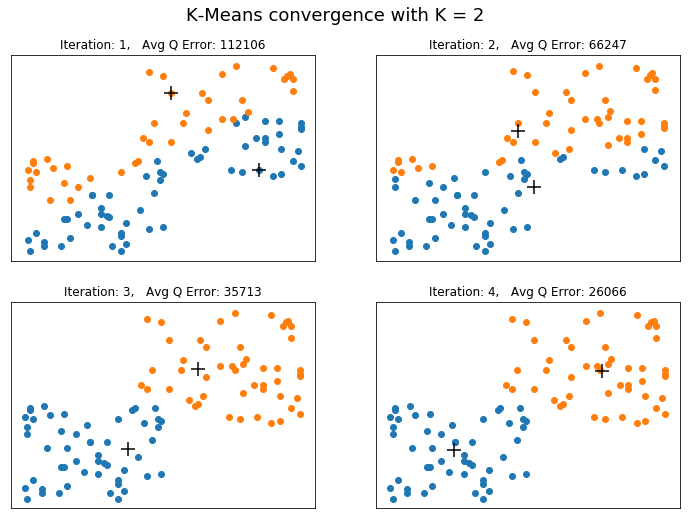

In [3]:
k_means(2)

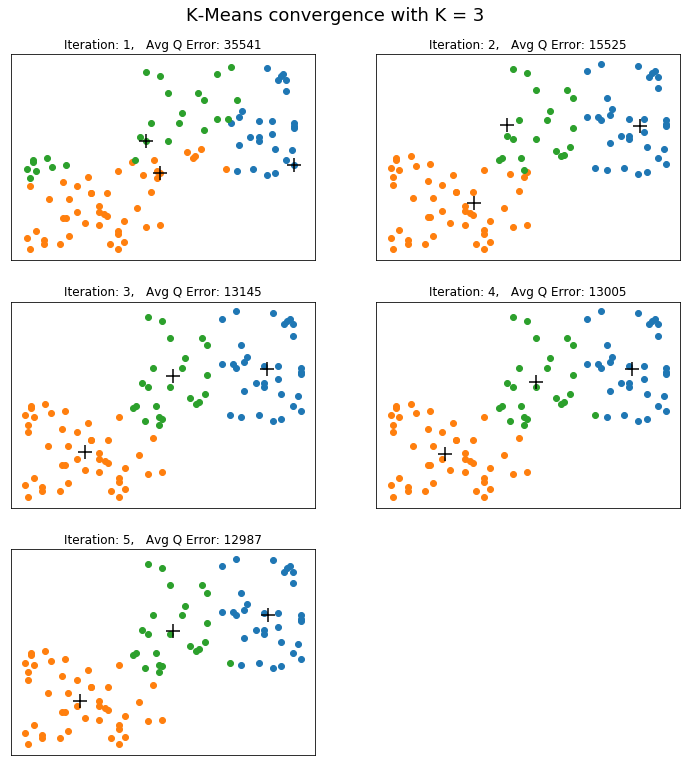

In [4]:
k_means(3)

---
### EXERCISE 13

Implement k-means soft clustering with online update, adopting the Euclidean distance as dissimilarity metric. Given the dataset data3.csv, apply the algorithm using $k = 3$ and $\eta = 0.1$ until the algorithm converges. As initial centroids use $x_{32}, x_{33}, x_{123}$, where the subscripts define the indexes of the points in the dataset. After convergence of the algorithm, compute the membership of $x_{10}$ with respect to each centroid and also plot the dataset using different colors for $x_{10}, x_{32}, x_{33}, x_{123}$.


In [5]:
dataset = pd.read_csv("Datasets/data3.csv")
dataset = np.array(dataset)
dataset[:5]

array([[39.46128942, 87.59501657],
       [35.71930498, 82.76249209],
       [41.37798662, 76.53659193],
       [32.65506422, 74.6999587 ],
       [37.37062414, 87.33577775]])

In [6]:
def dist(a, b):
    tmp = (b[0]-a[0])**2 + (b[1]-a[1])**2
    return np.sqrt(tmp)


def membership(x, p, i):
    tmp = [np.exp(-dist(x, proto)) for proto in p]
    return tmp[i]/sum(tmp)

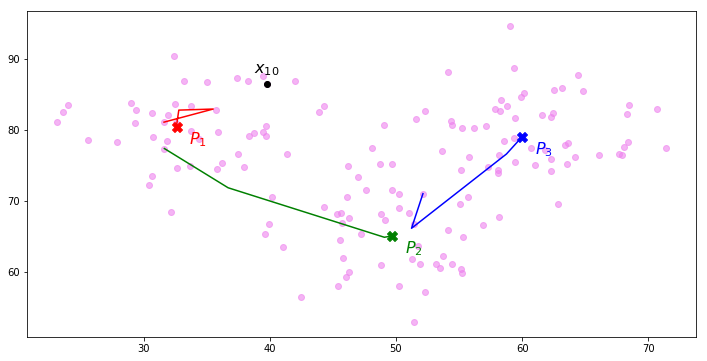

In [7]:
k = 3
η = 0.1
prototypes = dataset[[32, 33, 123]]
proto_history = np.array([prototypes.copy()])
converged = False


while not converged:
    old_prototypes = prototypes.copy()
    
    for row in dataset:
        for i in range(len(prototypes)):
            Δp = η * membership(row, prototypes, i) * (row-prototypes[i])
            prototypes[i] += Δp
    
    converged = np.array_equal(prototypes, old_prototypes)
    proto_history = np.append(proto_history, [prototypes.copy()], axis=0)


# Plot the data

proto_colors = ['red', 'green', 'blue']
plt.figure(figsize=(12, 6))
plt.scatter(dataset[:, 0], dataset[:, 1], alpha=0.6, color='violet')

for i in range(proto_history.shape[1]):
    plt.plot(proto_history[:, i, 0], proto_history[:, i, 1], color=proto_colors[i])
    plt.scatter(prototypes[i][0], prototypes[i][1], color=proto_colors[i], marker='X', s=100)
    plt.text(prototypes[i][0]+1, prototypes[i][1]-2.5, '$P_'+str(i+1)+'$', color=proto_colors[i], fontsize=16)

plt.scatter(dataset[10][0], dataset[10][1], color='black')
plt.text(dataset[10][0]-1, dataset[10][1]+1.5, '$x_{10}$', fontsize=16)
plt.show()

**Membership of $x_{10}$ with respect to $p_1$, $p_2$ and $p_3$:**

In [8]:
for i, p in enumerate(prototypes):
    print("membership(x10, p{}) = {:.8f}".format(i+1, membership(dataset[10], prototypes, i)))

membership(x10, p1) = 0.99999440
membership(x10, p2) = 0.00000069
membership(x10, p3) = 0.00000491
